GSLIB in Python
========

Introduction
---------------

This is a simple example on how to use pyslib with algorithm



In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib as gslib                   
import pygslib.alg_gamv as alg           


#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------

You can use [Pandas](http://pandas.pydata.org/) to import your data from csv, MS Excel, sql database, json, html, among others. If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 

In [2]:
#get the data in gslib format into a pandas Dataframe
mydata= gslib.read_gslib_file('../datasets/cluster.dat')  #I'm using the file in pygslib/datasets.

In [3]:
# This is a 2D file, in this GSLIB version we require 3D data and drillhole name or domain code
# so, we are adding constant elevation = 0 and a dummy BHID = 1 
mydata['Zlocation']=0
mydata['bhid']=1

# printing to verify results
print ' \n **** 5 first rows in my datafile \n\n  ', mydata.head(n=5)

 
 **** 5 first rows in my datafile 

      Xlocation  Ylocation  Primary  Secondary  Declustering Weight  Zlocation  \
0       39.5       18.5     0.06       0.22                1.619          0   
1        5.5        1.5     0.06       0.27                1.619          0   
2       38.5        5.5     0.08       0.40                1.416          0   
3       20.5        1.5     0.09       0.39                1.821          0   
4       27.5       14.5     0.09       0.24                1.349          0   

   bhid  
0     1  
1     1  
2     1  
3     1  
4     1  


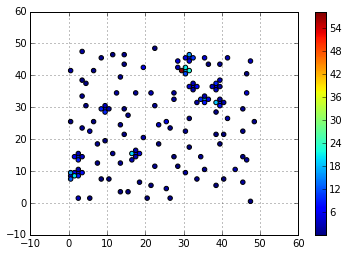

In [4]:
#view data in a 2D projection
plt.scatter(mydata['Xlocation'],mydata['Ylocation'], c=mydata['Primary'])
plt.colorbar()
plt.grid(True)
plt.show()

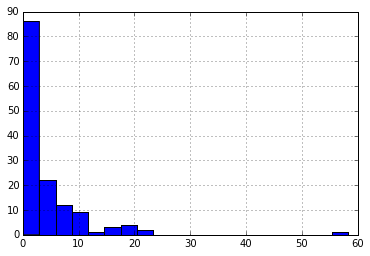

In [5]:
#plot histogram
mydata['Primary'].hist(bins=20)

As you can see the distribution is positively skew, you may not expect a nice traditional variogram. Data transformation will be required to identify the continuity

Algorithm one directional variogram
--------------

We are using the algorithm `gslib.gamv_alg_directional_1V` to calculate a single variogram direction values and plot.  This function returns: 

       pdis   Distance of pairs falling into this lag 
       pgam   Semivariogram, covariance, correlogram,... value
       phm    Mean of the tail data
       ptm    Mean of the head data
       pnump  Number of pairs
       fig    a matplotlib figure 


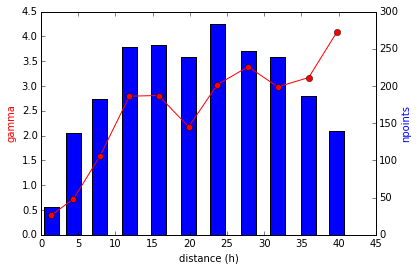

In [6]:
# first we define the parameters
X=mydata['Xlocation']
Y=mydata['Ylocation']
Z=mydata['Zlocation']
BHID=mydata['bhid']
V1=mydata['Primary']
nlag=10
xlag=4.
xltol=None
azm_d1= 0
atol= 22.25
bandwh=None
dip=0
dtol=90.
bandwd=None
isill=True
sills=None
ivtype=7
tmin=None
tmax=None


#then we calculate the variogram values and the plot. 
d1_pdis, d1_pgam, d1_phm, d1_ptm, d1_pnump, d1_fig =  alg.vdirectional_1V(X,Y,Z,BHID,V1, tmin, tmax,
                                                                            nlag,xlag,xltol,azm_d1,atol,
                                                                            bandwh,dip,dtol,bandwd,
                                                                            isill,sills,ivtype)

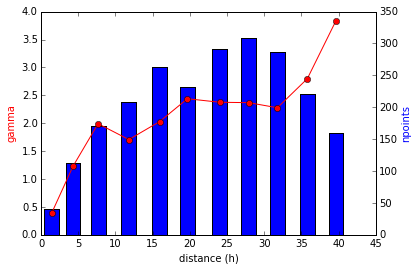

In [7]:
#for a different direction we just need to change the azimuth
azm_d2= 90


#then we calculate the variogram values and the plot. 
d2_pdis, d2_pgam, d2_phm, d2_ptm, d2_pnump, d2_fig =  alg.vdirectional_1V(X,Y,Z,BHID,V1, tmin, tmax,
                                                                            nlag,xlag,xltol,azm_d2,atol,
                                                                            bandwh,dip,dtol,bandwd,
                                                                            isill,sills,ivtype)

In [8]:
#Note that d2_pdis, d2_pgam are the lag and variogram values

import pandas as pd
d = {'Lag': d2_pdis, 'Variogram': d2_pgam}
pd.DataFrame (d)

,Lag,Variogram
0,1.425000,0.387195
1,4.307224,1.230246
2,7.670062,1.990681
3,11.801576,1.707140
4,15.926113,2.027378
5,19.677092,2.438471
6,24.026892,2.375162
7,27.916840,2.368250
8,31.766624,2.276921
9,35.792308,2.797125


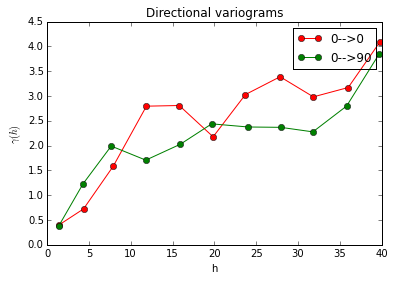

In [9]:
#if you want to plot one direction on top of the other 

plt.plot (d1_pdis, d1_pgam, '-o', label=str(dip) + '-->' + str(azm_d1), color='r')
plt.plot (d2_pdis, d2_pgam, '-o', label=str(dip) + '-->' + str(azm_d2), color='g')
plt.legend()
plt.xlabel('h')
plt.ylabel(r'$\gamma(h)$')
plt.title ('Directional variograms')


Dinamic parameters
--------

You can use the Ipython widget to define dynamically the parameters. 


> This may be slow for large datasets

<function pygslib.alg_gamv.vdirectional_1V>

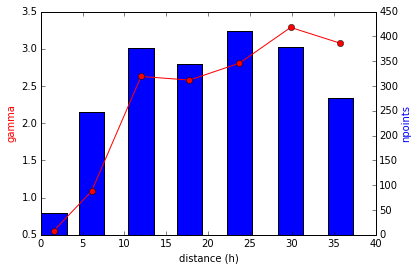

In [10]:
# same but interactive
from IPython.html import widgets
from IPython.html.widgets import interact, fixed

interact (alg.vdirectional_1V, 
             X=fixed(X),
             Y=fixed(Y),
             Z=fixed(Z),
             BHID=fixed(BHID),
             V1=fixed(V1), 
             tmin=fixed(tmin), 
             tmax=fixed(tmax), 
             nlag=widgets.IntSlider(min=1, max=10, step=1, value=6),
             xlag=widgets.FloatSlider(min=2, max=10.0, step=2, value=6.0),
             xltol=widgets.FloatSlider(min=1, max=10.0, step=1, value=3.0),
             azm=widgets.FloatSlider(min=0, max=180, step=10, value=0.0),
             atol=fixed(atol), 
             bandwh=fixed(bandwh),
             dip=fixed(dip),
             dtol=fixed(dtol),
             bandwd=fixed(bandwd), 
             isill=widgets.Checkbox(isill),
             sills=fixed(sills),
             ivtype= widgets.Dropdown ( options= {'traditional semivariogram':1, 
                                             'traditional cross semivariogram':2,
                                             'covariance':3, 
                                             'correlogram':4, 
                                             'general relative semivariogram':5,
                                             'pairwise relative semivariogram':6,
                                             'semivariogram of logarithms':7,
                                             'semimadogram':8}, value = 7))
          
